# 1 Dimensional Continuous Wavelet Transform and Edge Detection

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from scipy import signal

## Wavelet Function
A wavelet is a function $\psi \in L^2(\mathbb{R})$ and satisfies:

- $\int_{-\infty}^{\infty} \psi(t) \ \mathrm{d}t = 0.$
- $\|\psi\|=1$.

The Gaussian function:
$$g(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.$$
The first derivative of Gaussian function:
$$g(x) = \frac{x-\mu}{\sigma^3\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.$$

In [121]:
def gaus(N, sigma, scale):
    t = np.linspace(-5,5,N)
    g = 1/np.sqrt(scale) * 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-1/2 * ((-1*t/scale)/sigma)**2)
    g = g / np.sqrt(np.sum(g*g))
    return g, t

def gaus1(N, sigma, scale):
    t = np.linspace(-5,5,N)
    g = -1 * 1/np.sqrt(scale) * 1/(sigma**3*np.sqrt(2*np.pi)) * (-1*t/scale) * np.exp(-1/2 * (-1*(t/scale)/sigma)**2)
    g = g / np.sqrt(np.sum(g*g))
    return g, t

In [38]:
g0, t0 = gaus(128,1,1)
g1, t1 = gaus1(128,1,1)

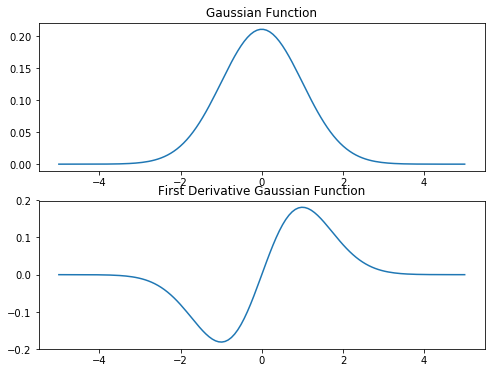

In [39]:
p1 = plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
plt.plot(t0,g0)
plt.title('Gaussian Function')
plt.subplot(2,1,2)
plt.plot(t1,g1)
plt.title('First Derivative Gaussian Function')

# Test Signal

In [40]:
N = 256; t = np.linspace(0,N-1,N);

In [41]:
sig1 = np.zeros(N)
sig1[0:127] = 1
# sig1[127] = 1

sig2 = np.zeros(N)
sig2[20:40] = 1; sig2[40:50] = 2
sig2[80:130] = -2/625 * (t[80:130]-105)**2 + 2;
sig2[150] = 2;
sig2[180:225] = 2/45**2 * (t[180:225]-225)**2

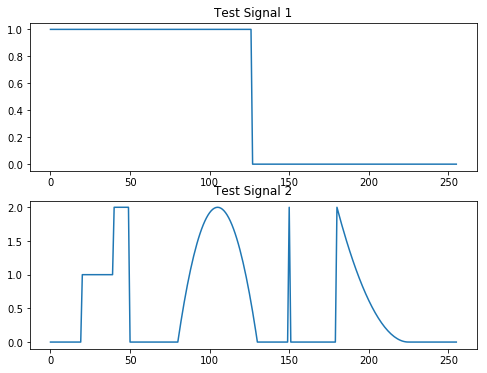

In [42]:
p2 = plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
plt.plot(t,sig1)
plt.title('Test Signal 1')
plt.subplot(2,1,2)
plt.plot(t,sig2)
plt.title('Test Signal 2')

## Continuous Wavelet Transform
Suppose $\psi$ is a real wavelet, then the wavelet transform can be defined:
$$Wf(u,s) = \int_{-\infty}^{+\infty} f(t)\frac{1}{\sqrt{s}}\psi(\frac{t-u}{s}) \ \mathrm{d}t.$$
Let
$$\bar{\psi}_s(t) = \frac{1}{\sqrt{s}}\psi(\frac{-t}{s}),$$
then
$$Wf(u,s) = f * \bar{\psi}_s(t),$$
$*$ is the convolution product.

In [43]:
def cwt_1d(sig, scale):
    C = np.zeros([len(scale), len(sig)])
    for i in range(len(scale)):
        wavelet, t = gaus1(len(sig),2,scale[i])
        C[i,:] = signal.fftconvolve(sig, wavelet, 'same')
    return C

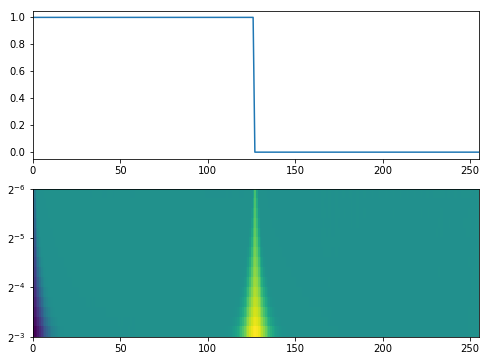

In [44]:
scale = np.linspace(-6, -3, 16);
scale = 2**scale
# scale = np.linspace(1/2**4, 1, 8);

C1 = cwt_1d(sig1, scale)
C2 = cwt_1d(sig2, scale)
p3, (ax0, ax1) = plt.subplots(nrows=2, figsize=[8,6])

ax0.plot(t,sig1)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C1)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

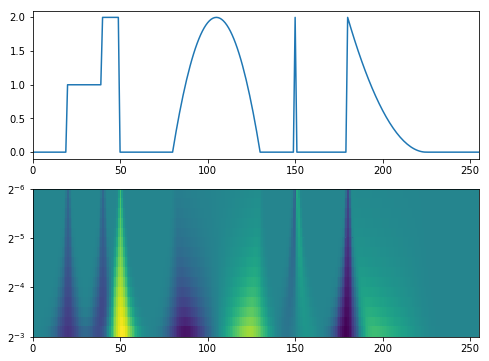

In [45]:
p4, (ax0, ax1) = plt.subplots(nrows=2, figsize=[8,6])

ax0.plot(t,sig2)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C2)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

## Wavelet Transform Modulus Maxima
Find wavelet transform local modulus maxima in each scale.

In [46]:
def wtmm_1d(C):
    nrow = C.shape[0]; ncol = C.shape[1]
    MM = np.zeros([nrow, ncol])
    for i in range(nrow):
        left = np.zeros(ncol)
        right = np.zeros(ncol)
        left[0:ncol-2] = C[i,1:ncol-1]
        right[1:ncol-1] = C[i,0:ncol-2]
        ind = np.where((C[i,:]-left) * (C[i,:]-right) >= 0)
        MM[i,ind] = np.abs(C[i,ind])
    return MM

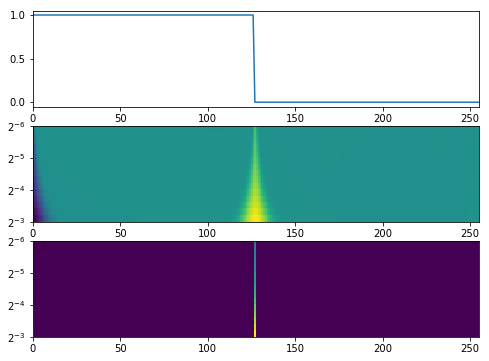

In [47]:
MM1 = wtmm_1d(C1)

p5, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=[8,6])

ax0.plot(t,sig1)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C1)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

ax2.pcolor(t, scale, MM1)
ax2.set_yscale("log", nonposx='clip', basey=2)
ax2.invert_yaxis()
# ax2.set_xlim([110, 140])

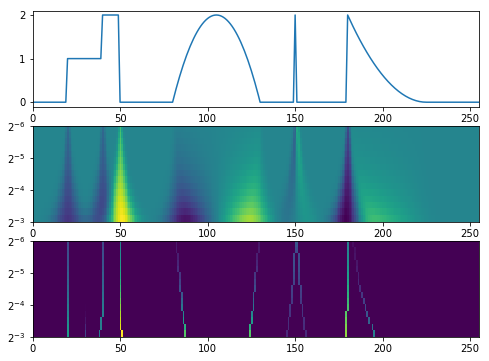

In [48]:
MM2 = wtmm_1d(C2)

p6, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=[8,6])

ax0.plot(t,sig2)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C2)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

ax2.pcolor(t, scale, MM2)
ax2.set_yscale("log", nonposx='clip', basey=2)
ax2.invert_yaxis()

## Local Lipschitz Regularity

In [92]:
C = MM2

th = 0.01

ind = np.where(np.abs(C[0,:]) > th * np.max(C))[0]
val = np.ndarray([C.shape[0], ind.shape[0]])
val[0,:] = C[0,ind]

for i in range(1,C.shape[0]):
    for j in range(ind.shape[0]):
        ind0 = ind[j]
        if C[i,ind0] > th*np.max(C):
            val[i,j] = C[i,ind0]
        elif C[i,ind0-1] > th*np.max(C):
            val[i,j] = C[i,ind0-1]
            ind[j] = ind0-1
        elif C[i,ind0+1] > th*np.max(C):
            val[i,j] = C[i,ind0+1]
            ind[j] = ind0+1

In [93]:
val1 = np.zeros(val.shape)
for i in range(val.shape[0]):
    val1[i,:] = np.log2(val[i,:])
val1

/Users/lida/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


array([[  6.64168071e-05,   6.64168071e-05,   1.00006642e+00,
         -1.86551299e+00,  -1.86551299e+00,   2.63595043e-01,
          2.63595043e-01,   9.72768016e-01,  -2.68989780e+00],
       [  9.62130710e-02,   9.62130710e-02,   1.09621307e+00,
         -1.57113110e+00,  -1.57113110e+00,   5.75434009e-02,
          5.75434009e-02,   1.05865306e+00,  -2.39335659e+00],
       [  1.80897472e-01,   1.80897472e-01,   1.18089747e+00,
         -1.28318426e+00,  -1.28318426e+00,   9.49142161e-02,
          9.49142161e-02,   1.13174934e+00,  -2.09378481e+00],
       [  2.66592803e-01,   2.66592803e-01,   1.26659280e+00,
         -9.97506115e-01,  -9.97506115e-01,   1.50900806e-01,
          1.50900806e-01,   1.20427444e+00,  -1.82387261e+00],
       [  3.55726320e-01,   3.55726320e-01,   1.35572632e+00,
         -7.24063501e-01,  -7.24063501e-01,   1.20312154e-01,
          1.20312154e-01,   1.27837212e+00,  -1.53505748e+00],
       [  4.47659220e-01,   4.47659215e-01,   1.44765922e+00,
   

In [96]:
y = val1[:,3]
drop_inf = np.isinf(y)
y = y[~drop_inf]
scale1 = np.log2(scale)
x = scale1[~drop_inf]
A = np.ones([y.shape[0],2])
A[:,0] = x

m, c = np.linalg.lstsq(A,y)[0]
m

1.2812529221203039

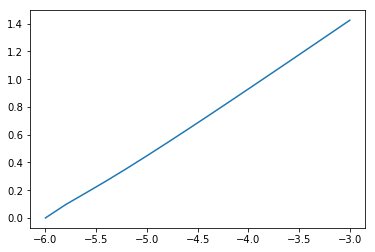

In [91]:
plt.plot(x, y)

In [122]:
def LE_1d(C, scale):
    th = 0.01
    
    ind = np.where(np.abs(C[0,:]) > th * np.max(C))[0]
    val = np.zeros([C.shape[0], ind.shape[0]])
    val[0,:] = C[0,ind]

#     for i in range(1,C.shape[0]):
#         for j in range(ind.shape[0]):
#             ind0 = ind[j]
#             for k in range(-1*gap,gap+1):
#                 if C[i,ind0+k] > th*np.max(C):
#                     val[i,j] = C[i,ind0+k]
#                     ind[j] = ind0+k 
    for i in range(1,C.shape[0]):
        for j in range(ind.shape[0]):
            ind0 = ind[j]
            if ind0 > 0:
                if C[i,ind0] > th*np.max(C):
                    val[i,j] = C[i,ind0]
                elif C[i,ind0-1] > th*np.max(C):
                    val[i,j] = C[i,ind0-1]
                    ind[j] = ind0-1
                elif C[i,ind0+1] > th*np.max(C):
                    val[i,j] = C[i,ind0+1]
                    ind[j] = ind0+1
                else:
                    ind[j] = -99999 
    
    val1 = np.zeros(val.shape)
    for i in range(val.shape[0]):
        val1[i,:] = np.log2(val[i,:])
        
    alpha = np.zeros(val1.shape[1])
    scale1 = np.log2(scale)
    for i in range(val1.shape[1]):
        y = val1[:,i]
        drop_inf = np.isinf(y)
        y = y[~drop_inf]
        x = scale1[~drop_inf]
        A = np.ones([y.shape[0],2])
        A[:,0] = x
        m, c = np.linalg.lstsq(A,y)[0]
        alpha[i] = m - 1/2
    
    ind = np.where(np.abs(C[0,:]) > th * np.max(C))[0]
    
    return alpha, ind, val1, scale1

In [123]:
a, ind, val, s = LE_1d(MM2, scale)

/Users/lida/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log2


In [124]:
a

array([-0.02315978, -0.12578369, -0.06903509,  0.78125292,  0.78122553,
       -0.94468631, -0.91327961, -0.16102989,  0.84202644])

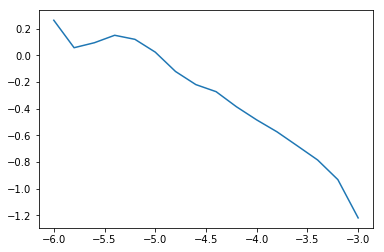

In [125]:
plt.plot(s, val[:,5])

In [64]:
for i in range(-1,0):
    print(i)

-1
